In [ ]:
from sklearn.model_selection import cross_val_score

In [3]:
?cross_val_score

In [7]:
import numpy as np

In [8]:
X = np.random.standard_normal(30*500).reshape(30, 500)

In [9]:
y = np.random.standard_normal(30) >= 0

In [10]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [11]:
Xp = SelectKBest(mutual_info_classif, k=5).fit_transform(X, y)

In [267]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
cross_val_score(DecisionTreeClassifier(max_depth=5), Xp, y, cv=10).mean()

0.59999999999999998

In [14]:
depths = range(1, 10)

In [15]:
scores = [cross_val_score(DecisionTreeClassifier(max_depth=i), Xp, y, cv=5) for i in depths]

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

<Container object of 3 artists>

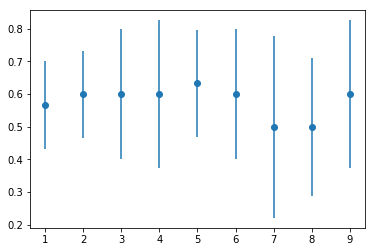

In [18]:
plt.errorbar(depths, [s.mean() for s in scores], yerr=[s.std() for s in scores], fmt='o')

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
right_scores = []
feature_selector = SelectKBest(mutual_info_classif, k=5)
model = DecisionTreeClassifier()
pipeline = Pipeline([('f_select', feature_selector),
                     ('tree', model)])
for d in depths:
    pipeline.set_params(tree__max_depth=d)
    right_scores.append(cross_val_score(pipeline, X, y, cv=5))

<Container object of 3 artists>

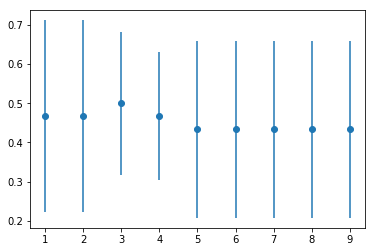

In [21]:
plt.errorbar(depths, [s.mean() for s in right_scores], yerr=[s.std() for s in right_scores], fmt='o')

In [22]:
import pandas as pd

In [23]:
import re

In [139]:
print open('data/spambase/spambase.names').read()

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [105]:
names = re.findall('^(.+):', open('data/spambase/spambase.names').read(), re.MULTILINE)

In [106]:
del names[0]
names.append('label')

In [26]:
spam_data = pd.read_csv('data/spambase/spambase.data', names=names)

In [151]:
spam_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


In [27]:
depths = range(2, 22, 2)

In [271]:
X, y = spam_data.drop('label', axis=1), spam_data['label']

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [285]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)

In [286]:
model = 

In [296]:
ds = range(1, 50)
accs_tr = [accuracy_score(y_pred=(DecisionTreeClassifier(max_depth=d)
                              .fit(Xtr, ytr)
                              .predict(Xtr)),
               y_true=ytr) for d in ds]
accs_te = [accuracy_score(y_pred=(DecisionTreeClassifier(max_depth=d)
                              .fit(Xtr, ytr)
                              .predict(Xte)),
               y_true=yte) for d in ds]

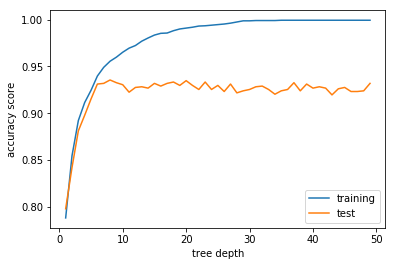

In [297]:
plt.plot(ds, accs_tr, label='training')
plt.plot(ds, accs_te, label='test')
plt.xlabel('tree depth')
plt.ylabel('accuracy score')
plt.legend()
plt.savefig('../12-evaluation/img/train_test_acc.png', dpi=300)

In [341]:
from sklearn.linear_model import LogisticRegression

In [364]:
Xf, yf = make_classification(1000, n_features=10, n_informative=10, n_redundant=0, class_sep=1)
fit_scores = []
n_trains = range(10, 200, 5)
for i in n_trains:
    s_tmp = []
    for _ in range(40):
        X_ftr, X_fte, y_ftr, y_fte = train_test_split(X, y, train_size=i)
        s_tmp.append(accuracy_score(y_pred=(LogisticRegression()
                                             .fit(X_ftr, y_ftr)
                                             .predict(X_fte)), y_true=y_fte))
    fit_scores.append(np.mean(s_tmp))

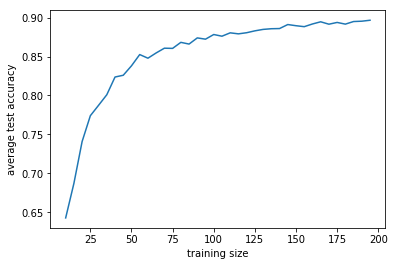

In [366]:
plt.plot(n_trains, fit_scores)
plt.xlabel('training size')
plt.ylabel('average test accuracy')
plt.savefig('../12-evaluation/img/train_size_acc.png', dpi=300)

In [29]:
scores = [cross_val_score(DecisionTreeClassifier(max_depth=d), X, y) for d in depths]

In [30]:
means, sds = [[f(s) for s in scores] for f in (np.mean, np.std)]

<Container object of 3 artists>

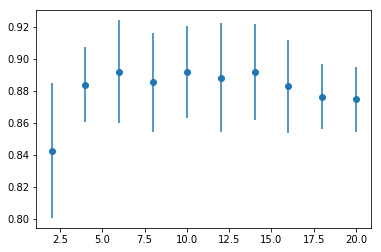

In [31]:
plt.errorbar(depths, means, yerr=sds, fmt='o')

In [32]:
?DecisionTreeClassifier

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
def cv_spam(models):
    scores = [cross_val_score(model, X, y) for model in models]
    means, sds = [[f(s) for s in scores] for f in (np.mean, np.std)]
    return means, sds

In [35]:
mean_tree, sd_tree = cv_spam([DecisionTreeClassifier(max_depth=d) for d in depths])

In [36]:
mean_bag, sd_bag = cv_spam([BaggingClassifier(DecisionTreeClassifier(max_depth = d),
                                              n_estimators=10, n_jobs=4) for d in depths])

<Container object of 3 artists>

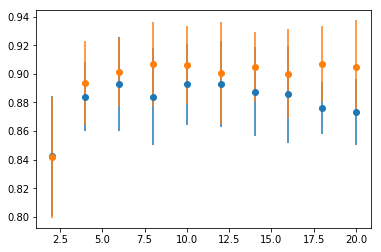

In [37]:
plt.errorbar(depths, mean_tree, yerr=sd_tree, fmt='o', )
plt.errorbar(depths, mean_bag, yerr=sd_bag, fmt='o')

In [41]:
from sklearn.model_selection import GridSearchCV

In [45]:
gs_model = GridSearchCV(DecisionTreeClassifier(), {'max_depth': depths})

In [47]:
gs_fit = gs_model.fit(X, y)

In [48]:
gs_fit.cv_results_

{'mean_fit_time': array([ 0.01514967,  0.02091726,  0.02797699,  0.02989435,  0.03457936,
         0.0383153 ,  0.05305068,  0.05134892,  0.04594072,  0.04605595]),
 'mean_score_time': array([ 0.00100207,  0.00085394,  0.00079075,  0.0007236 ,  0.00074402,
         0.000741  ,  0.00106692,  0.00073171,  0.00065001,  0.00064174]),
 'mean_test_score': array([ 0.8426429 ,  0.88437296,  0.89219735,  0.88459031,  0.89480548,
         0.88937188,  0.89263204,  0.88437296,  0.87980874,  0.86959357]),
 'mean_train_score': array([ 0.86991985,  0.91512723,  0.94099073,  0.95881283,  0.96902804,
         0.97826571,  0.98348282,  0.98782989,  0.99141578,  0.99337188]),
 'param_max_depth': masked_array(data = [2 4 6 8 10 12 14 16 18 20],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': ({'max_depth': 2},
  {'max_depth': 4},
  {'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 14},
  

In [49]:
gs_fit.best_params_

{'max_depth': 10}

In [50]:
gs_fit.best_score_

0.89480547707020208

In [53]:
gs_fit.cv_results_['param_max_depth'], gs_fit.cv_results_['mean_test_score']

(masked_array(data = [2 4 6 8 10 12 14 16 18 20],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 array([ 0.8426429 ,  0.88437296,  0.89219735,  0.88459031,  0.89480548,
         0.88937188,  0.89263204,  0.88437296,  0.87980874,  0.86959357]))

<Container object of 3 artists>

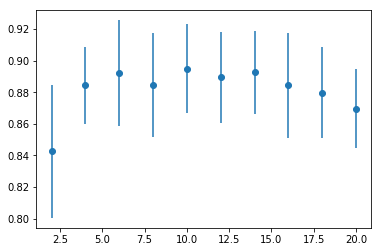

In [56]:
plt.errorbar(depths, gs_fit.cv_results_['mean_test_score'], gs_fit.cv_results_['std_test_score'], fmt='o')

In [73]:
gs_fit.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

(array([ 28.,   8.,   2.,   2.,   1.,   2.,   3.,   0.,   1.,   0.,   1.,
          0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.        ,  0.00166667,  0.00333333,  0.005     ,  0.00666667,
         0.00833333,  0.01      ,  0.01166667,  0.01333333,  0.015     ,
         0.01666667,  0.01833333,  0.02      ,  0.02166667,  0.02333333,
         0.025     ,  0.02666667,  0.02833333,  0.03      ,  0.03166667,
         0.03333333,  0.035     ,  0.03666667,  0.03833333,  0.04      ,
         0.04166667,  0.04333333,  0.045     ,  0.04666667,  0.04833333,
         0.05      ]),
 <a list of 30 Patch objects>)

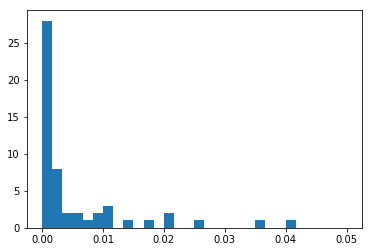

In [83]:
plt.hist(gs_fit.best_estimator_.feature_importances_, bins=30, range=(0, 0.05))

In [311]:
from sklearn.feature_selection import SelectFromModel

In [312]:
feature_selection = SelectFromModel(gs_fit.best_estimator_, prefit=True, threshold=0.01)

In [313]:
feature_selection.transform(X).shape

(4601, 14)

In [314]:
X.columns[feature_selection.get_support()]

Index([u'word_freq_our', u'word_freq_remove', u'word_freq_free',
       u'word_freq_email', u'word_freq_you', u'word_freq_money',
       u'word_freq_hp', u'word_freq_george', u'word_freq_edu', u'char_freq_!',
       u'char_freq_$', u'capital_run_length_average',
       u'capital_run_length_longest', u'capital_run_length_total'],
      dtype='object')

In [315]:
importances = list(gs_fit.best_estimator_.feature_importances_[feature_selection.get_support()])

In [316]:
fnames = list(X.columns[feature_selection.get_support()])

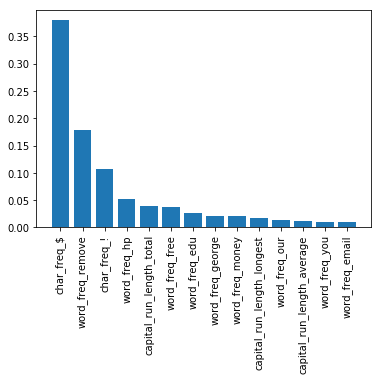

In [317]:
plt.bar(range(len(fnames)), sorted(importances, key=lambda i: -i))
plt.xticks(range(len(fnames)),
           sorted(fnames, key=lambda i: -importances[fnames.index(i)]), rotation=90)
None

In [60]:
bag_model = BaggingClassifier(DecisionTreeClassifier())

In [66]:
bag_model.get_params().keys()

['base_estimator__min_samples_split',
 'n_jobs',
 'verbose',
 'base_estimator',
 'max_features',
 'base_estimator__min_samples_leaf',
 'max_samples',
 'base_estimator__max_depth',
 'base_estimator__max_features',
 'base_estimator__min_weight_fraction_leaf',
 'random_state',
 'base_estimator__class_weight',
 'oob_score',
 'base_estimator__splitter',
 'base_estimator__random_state',
 'base_estimator__presort',
 'base_estimator__criterion',
 'n_estimators',
 'base_estimator__max_leaf_nodes',
 'bootstrap_features',
 'warm_start',
 'bootstrap',
 'base_estimator__min_impurity_split']

In [68]:
bag_model = GridSearchCV(bag_model, {'base_estimator__max_depth': depths}).fit(X, y)

In [71]:
bag_model.cv_results_['params']

({'base_estimator__max_depth': 2},
 {'base_estimator__max_depth': 4},
 {'base_estimator__max_depth': 6},
 {'base_estimator__max_depth': 8},
 {'base_estimator__max_depth': 10},
 {'base_estimator__max_depth': 12},
 {'base_estimator__max_depth': 14},
 {'base_estimator__max_depth': 16},
 {'base_estimator__max_depth': 18},
 {'base_estimator__max_depth': 20})

<Container object of 3 artists>

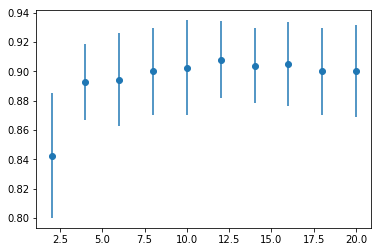

In [72]:
plt.errorbar(depths, bag_model.cv_results_['mean_test_score'], bag_model.cv_results_['std_test_score'], fmt='o')

In [240]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [253]:
Ns = [i*20 for i in range(1, 11)]

In [254]:
rf_gs = GridSearchCV(RandomForestClassifier(), {'n_estimators': Ns}).fit(X, y)

In [255]:
gb_gs = GridSearchCV(GradientBoostingClassifier(), {'n_estimators': Ns}).fit(X, y)

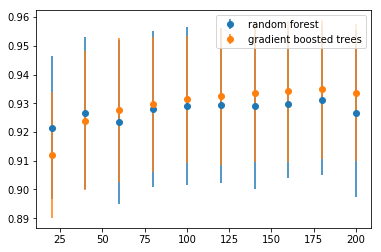

In [256]:
plt.errorbar(Ns,
             rf_gs.cv_results_['mean_test_score'],
             rf_gs.cv_results_['std_test_score'], fmt='o', label='random forest')
plt.errorbar(Ns,
             gb_gs.cv_results_['mean_test_score'],
             gb_gs.cv_results_['std_test_score'], fmt='o', label='gradient boosted trees')
plt.legend()

In [102]:
spark_spam = sc.textFile('data/spambase/spambase.data')

In [103]:
spark_spam.take(5)

[u'0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1',
 u'0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1',
 u'0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1',
 u'0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0,0,3.18,0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.137,0,0.137,0,0,3.537,40,191,1',
 u'0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0,0,3.18,0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.135,0,0.135,0,0,3.537,40,191,1']

In [121]:
from pyspark.sql import Row

In [141]:
names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [144]:
ord(';')

59

In [154]:
def sub_fun(match):
    return 'a' + str(ord(match.group(0)))

In [155]:
re.sub('[^a-z_0-9]', sub_fun, 'char_freq_#')

'char_freq_a35'

In [156]:
spark_names = [re.sub('[^a-z_0-9]', sub_fun, name) for name in names]

In [157]:
def line_to_row(line):
    vals = line.split(',')
    argdict = {name: float(val) for name, val in zip(spark_names, vals)}
    return Row(**argdict)

In [158]:
df = spark.createDataFrame(spark_spam.map(line_to_row))

In [159]:
df.select(df.columns[:5]).show(5)

+--------------------------+--------------------------+------------------------+-------------+-------------+
|capital_run_length_average|capital_run_length_longest|capital_run_length_total|char_freq_a33|char_freq_a35|
+--------------------------+--------------------------+------------------------+-------------+-------------+
|                     3.756|                      61.0|                   278.0|        0.778|          0.0|
|                     5.114|                     101.0|                  1028.0|        0.372|        0.048|
|                     9.821|                     485.0|                  2259.0|        0.276|         0.01|
|                     3.537|                      40.0|                   191.0|        0.137|          0.0|
|                     3.537|                      40.0|                   191.0|        0.135|          0.0|
+--------------------------+--------------------------+------------------------+-------------+-------------+
only showing top 5 

In [131]:
from pyspark.ml.feature import RFormula

In [160]:
features = ['char_freq_$', 'word_freq_remove', 'char_freq_!']
spark_features = [spark_names[names.index(i)] for i in features]

In [161]:
spark_features

['char_freq_a36', 'word_freq_remove', 'char_freq_a33']

In [162]:
df.select(spark_features).show()

+-------------+----------------+-------------+
|char_freq_a36|word_freq_remove|char_freq_a33|
+-------------+----------------+-------------+
|          0.0|             0.0|        0.778|
|         0.18|            0.21|        0.372|
|        0.184|            0.19|        0.276|
|          0.0|            0.31|        0.137|
|          0.0|            0.31|        0.135|
|          0.0|             0.0|          0.0|
|        0.054|             0.0|        0.164|
|          0.0|             0.0|          0.0|
|        0.203|             0.3|        0.181|
|        0.081|            0.38|        0.244|
|          0.0|            0.96|        0.462|
|          0.0|            0.25|        0.663|
|          0.0|             0.0|        0.786|
|          0.0|             0.9|          0.0|
|          0.0|             0.0|        0.357|
|        0.063|            0.42|        0.572|
|          0.0|             0.0|        0.428|
|         0.37|             0.0|        1.975|
|          0.

In [163]:
formula = 'label ~ ' + ' + '.join(spark_features)

In [164]:
selector = RFormula(formula=formula)

In [165]:
X_formula = selector.fit(df).transform(df)

In [167]:
X_formula.select('features', 'label').show(5)

+------------------+-----+
|          features|label|
+------------------+-----+
|   [0.0,0.0,0.778]|  1.0|
| [0.18,0.21,0.372]|  1.0|
|[0.184,0.19,0.276]|  1.0|
|  [0.0,0.31,0.137]|  1.0|
|  [0.0,0.31,0.135]|  1.0|
+------------------+-----+
only showing top 5 rows



In [193]:
from pyspark.ml.feature import VectorAssembler

In [194]:
input_features = spark_names
input_features.remove('label')

In [202]:
X_all = (VectorAssembler(inputCols=input_features, outputCol='features')
         .transform(df).select('features', 'label'))

In [203]:
from pyspark.ml.feature import ChiSqSelector

In [204]:
cs_selector = ChiSqSelector(numTopFeatures=10, outputCol='selected_features',featuresCol='features').fit(X_all)
X_chisq = cs_selector.transform(X_all)

In [205]:
X_chisq.show(5)

+--------------------+-----+--------------------+
|            features|label|   selected_features|
+--------------------+-----+--------------------+
|(57,[1,2,4,11,15,...|  1.0|(10,[1,2,3],[0.64...|
|(57,[0,1,2,4,5,6,...|  1.0|(10,[0,1,2,3,4,5,...|
|(57,[0,2,4,5,6,7,...|  1.0|(10,[0,2,3,4,5,6,...|
|(57,[4,6,7,8,9,10...|  1.0|(10,[3,5,6,7,8,9]...|
|(57,[4,6,7,8,9,10...|  1.0|(10,[3,5,6,7,8,9]...|
+--------------------+-----+--------------------+
only showing top 5 rows



In [206]:
[input_features[i] for i in cs_selector.selectedFeatures]

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive']

In [168]:
from pyspark.ml.classification import DecisionTreeClassifier

In [207]:
X_all.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(57,[1,2,4,11,15,...|  1.0|
|(57,[0,1,2,4,5,6,...|  1.0|
|(57,[0,2,4,5,6,7,...|  1.0|
|(57,[4,6,7,8,9,10...|  1.0|
|(57,[4,6,7,8,9,10...|  1.0|
+--------------------+-----+
only showing top 5 rows



In [208]:
assembler = VectorAssembler(inputCols=input_features, outputCol='features')

In [209]:
model = DecisionTreeClassifier(maxDepth=5)

In [211]:
from pyspark.ml import Pipeline as SparkPipeline

In [214]:
pipe = SparkPipeline(stages=[assembler, model])

In [222]:
train, test = df.randomSplit([0.8, 0.2])

In [223]:
model = pipe.fit(train)

In [224]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [226]:
BinaryClassificationEvaluator().evaluate(model.transform(test)) #AUC

0.7823220474540123

In [227]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [228]:
spark_tree_model = DecisionTreeClassifier()

In [230]:
param_grid = ParamGridBuilder().addGrid(spark_tree_model.maxDepth, range(2, 22, 2)).build()

In [231]:
cv_pipe = SparkPipeline(stages=[assembler, spark_tree_model])

In [235]:
cross_validation = CrossValidator(estimator=cv_pipe,
                                  estimatorParamMaps=param_grid,
                                  evaluator=BinaryClassificationEvaluator(),
                                  numFolds=3)

In [237]:
vc_model = cross_validation.fit(df)

In [238]:
vc_model.avgMetrics

[0.7120176876429138,
 0.7874188298619624,
 0.8180913336381239,
 0.8141895559596227,
 0.8374464724445045,
 0.8634555940608011,
 0.8774869295429887,
 0.8923755230536281,
 0.9060822853490376,
 0.9201519876823183]